# Slope primary dependence

Parameterize the primary dependence of mean square slope on wind speed in Hurricane Idalia (2023).

In [1]:
import cartopy
import colorcet
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

from configure import read_stored_variable
from src import stats, plotting

# Setup

Run the previous notebook and read stored variables.

In [2]:
%%capture
%run 'nb04-spectra.ipynb'
%run -i configure.py

In [3]:
microswift_df = read_stored_variable('microswift_df')
spotter_df = read_stored_variable('spotter_df')
ian_spotter_coamps_df = read_stored_variable('ian_spotter_coamps_df')
fiona_spotter_coamps_df = read_stored_variable('fiona_spotter_coamps_df')
coamps_ds = read_stored_variable('coamps_ds')
coamps_xy_ds = read_stored_variable('coamps_xy_ds')
sfmr_ds = read_stored_variable('sfmr_ds')
ndbc_ds = read_stored_variable('ndbc_ds')

plotting.configure_figures()

## Mean square slope versus wind speed

Plot Hurricane Idalia (2023) Spotter and microSWIFT mean square slope versus COAMPS-TC wind speed.

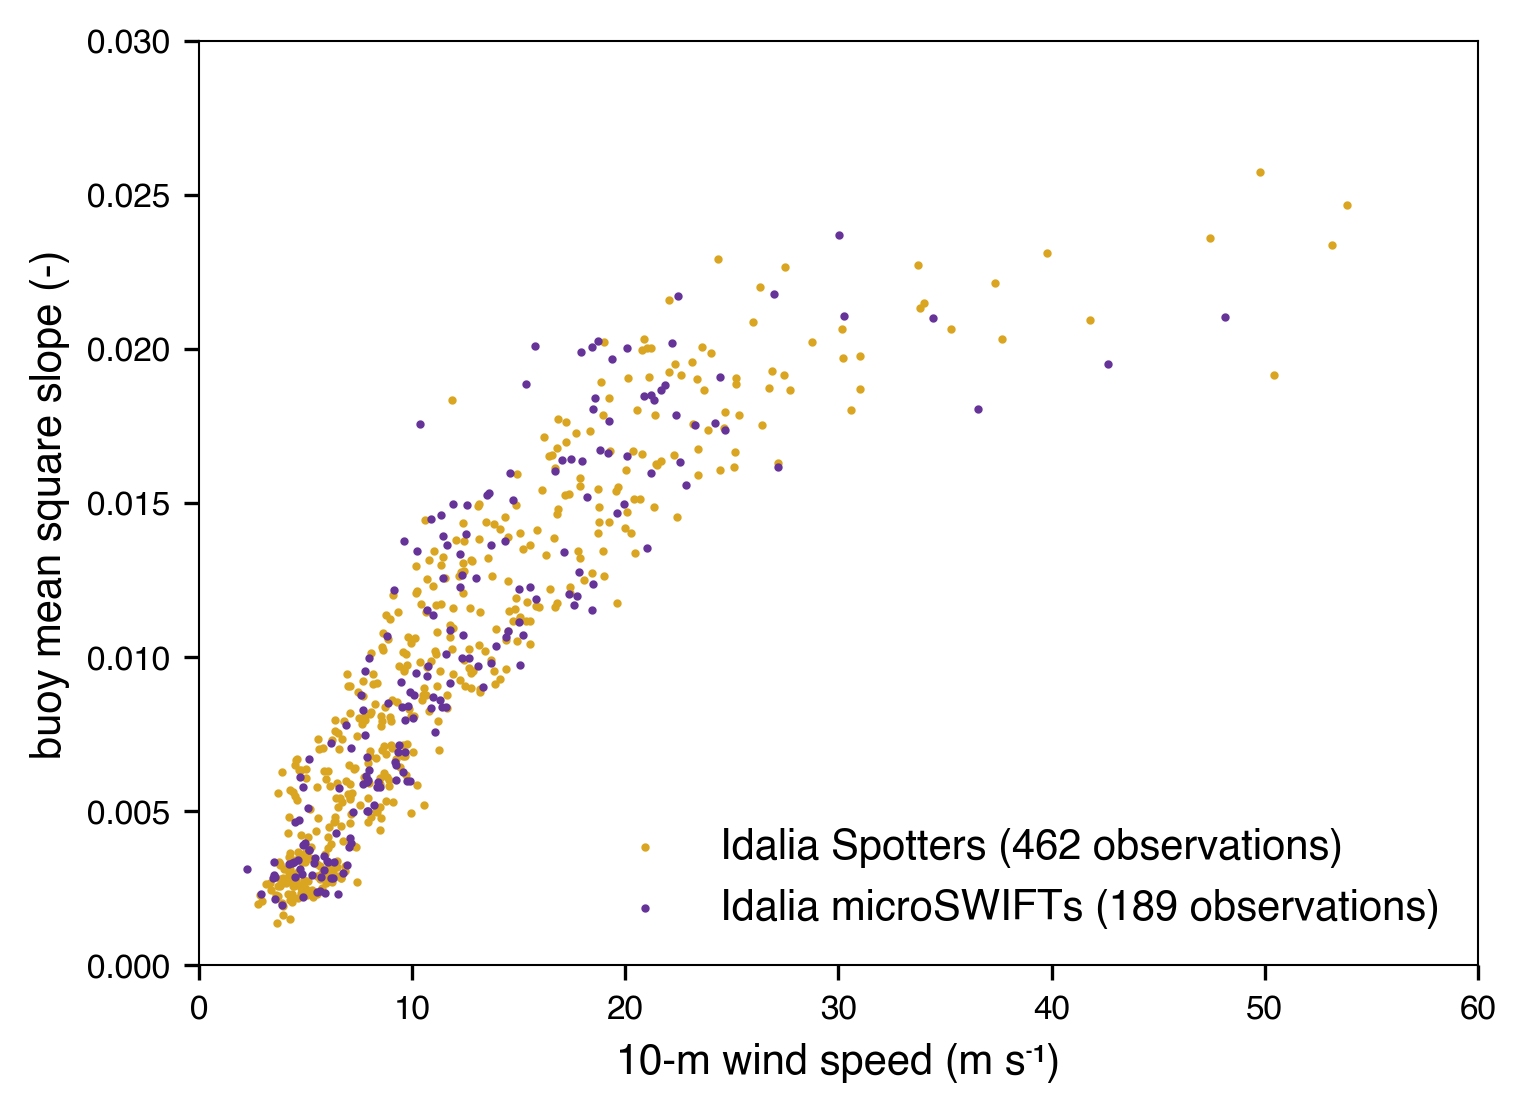

In [4]:
FIGURE_TITLE = "mean_square_slope_versus_wind_speed_by_drifter"
FIGURE_SIZE = (plotting.figure_full_width, 4)
FIGURE_MARKER_SIZE = 1

fig,ax = plt.subplots(figsize=FIGURE_SIZE)

ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    label=f'Idalia Spotters ({spotter_df["wind_speed"].notna().sum()} observations)',
    color=plotting.get_drifter_color('spotter'),
    edgecolor=plotting.get_drifter_color('spotter'),
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    label=f'Idalia microSWIFTs ({microswift_df["wind_speed"].notna().sum()} observations)',
    color=plotting.get_drifter_color('microswift'),
    edgecolor=plotting.get_drifter_color('microswift'),
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(loc='lower right', frameon=False, fontsize=10)

# fig.savefig(f"{FIGURE_TITLE}.{IMAGE_FILE_TYPE}", dpi=IMAGE_RESOLUTION, format=IMAGE_FILE_TYPE)

Plot Hurricane Idalia (2023), Hurricane Fiona (2022), and Hurricane Ian (2022) mean square slope versus COAMPS-TC wind speed (from Davis et al., 2023)

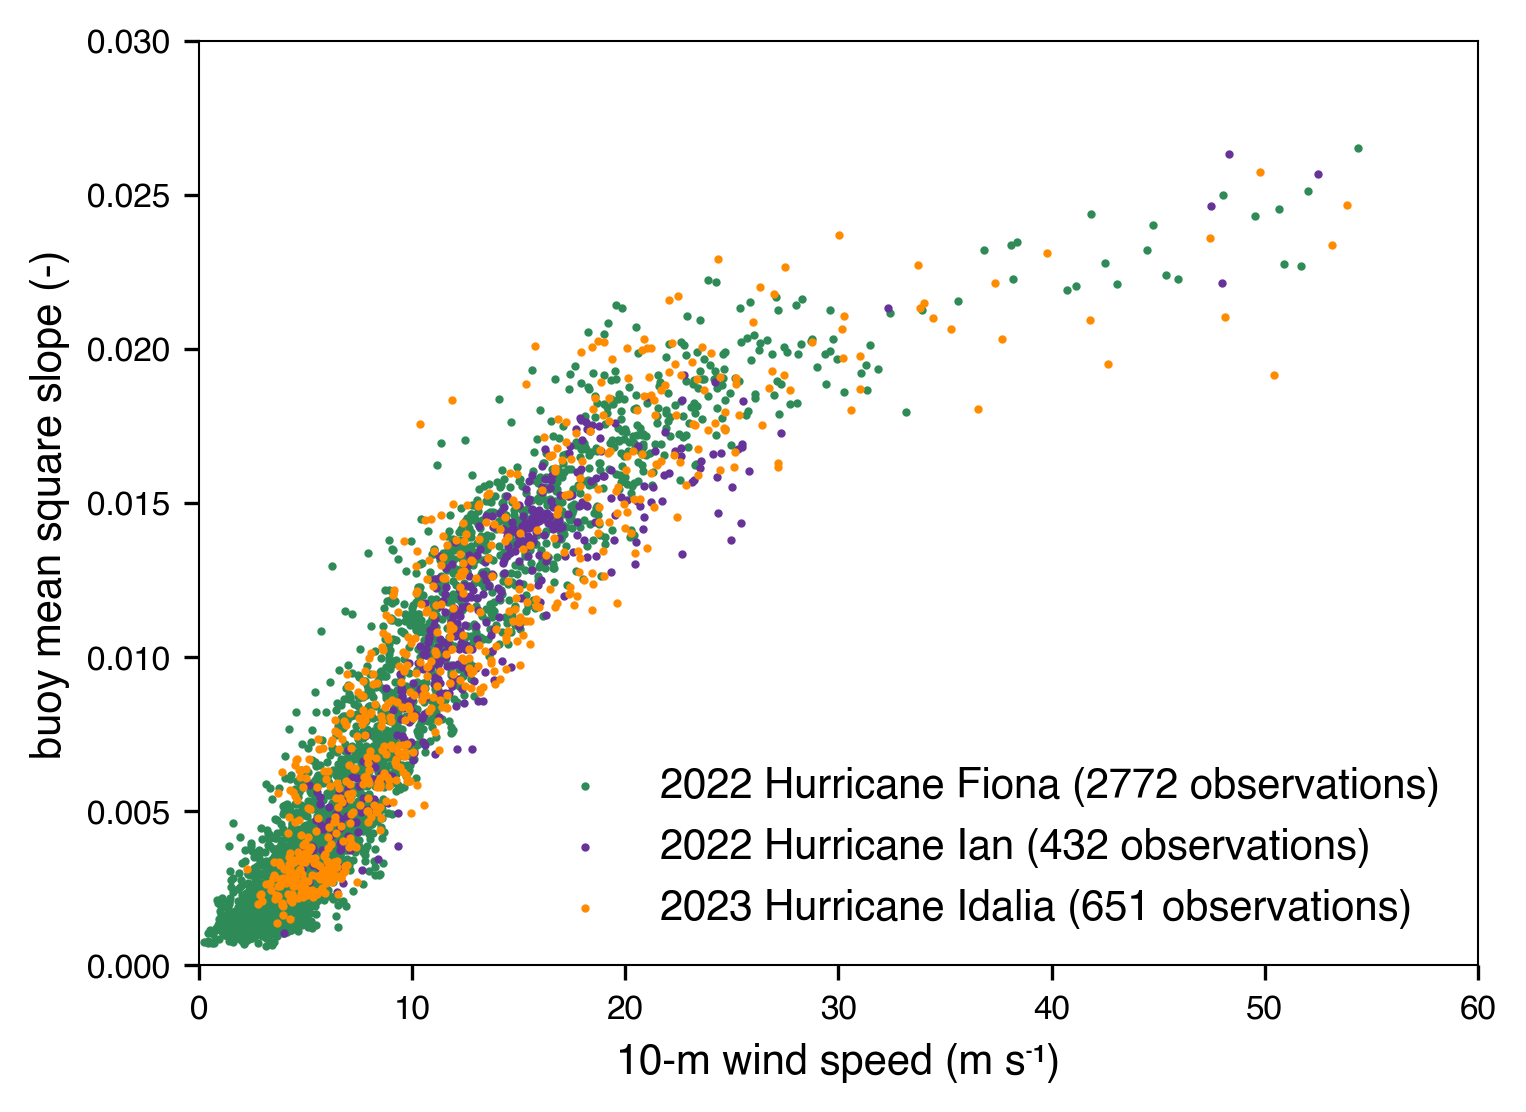

In [5]:
FIGURE_TITLE = "mean_square_slope_versus_wind_speed_with_davis_et_al_2023"
FIGURE_SIZE = (plotting.figure_full_width, 4)
FIGURE_MARKER_SIZE = 1

fig,ax = plt.subplots(figsize=FIGURE_SIZE)

ax.scatter(
    x=fiona_spotter_coamps_df['wind_speed'],
    y=fiona_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'2022 Hurricane Fiona ({fiona_spotter_coamps_df["wind_speed"].notna().sum()} observations)',
    color='seagreen',
    edgecolor='seagreen',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=ian_spotter_coamps_df['wind_speed'],
    y=ian_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'2022 Hurricane Ian ({ian_spotter_coamps_df["wind_speed"].notna().sum()} observations)',
    color='rebeccapurple',
    edgecolor='rebeccapurple',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    label=f'2023 Hurricane Idalia ({spotter_df["wind_speed"].notna().sum() + microswift_df["wind_speed"].notna().sum()} observations)',
    color='darkorange',
    edgecolor='darkorange',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    color='darkorange',
    edgecolor='darkorange',
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(loc='lower right', frameon=False, fontsize=10)

# fig.savefig(f"{FIGURE_TITLE}.{IMAGE_FILE_TYPE}", dpi=IMAGE_RESOLUTION, format=IMAGE_FILE_TYPE)

Compare mss calculated using the dispersion relationship (intermediate depths) to mss calculated using the deep water assumption.

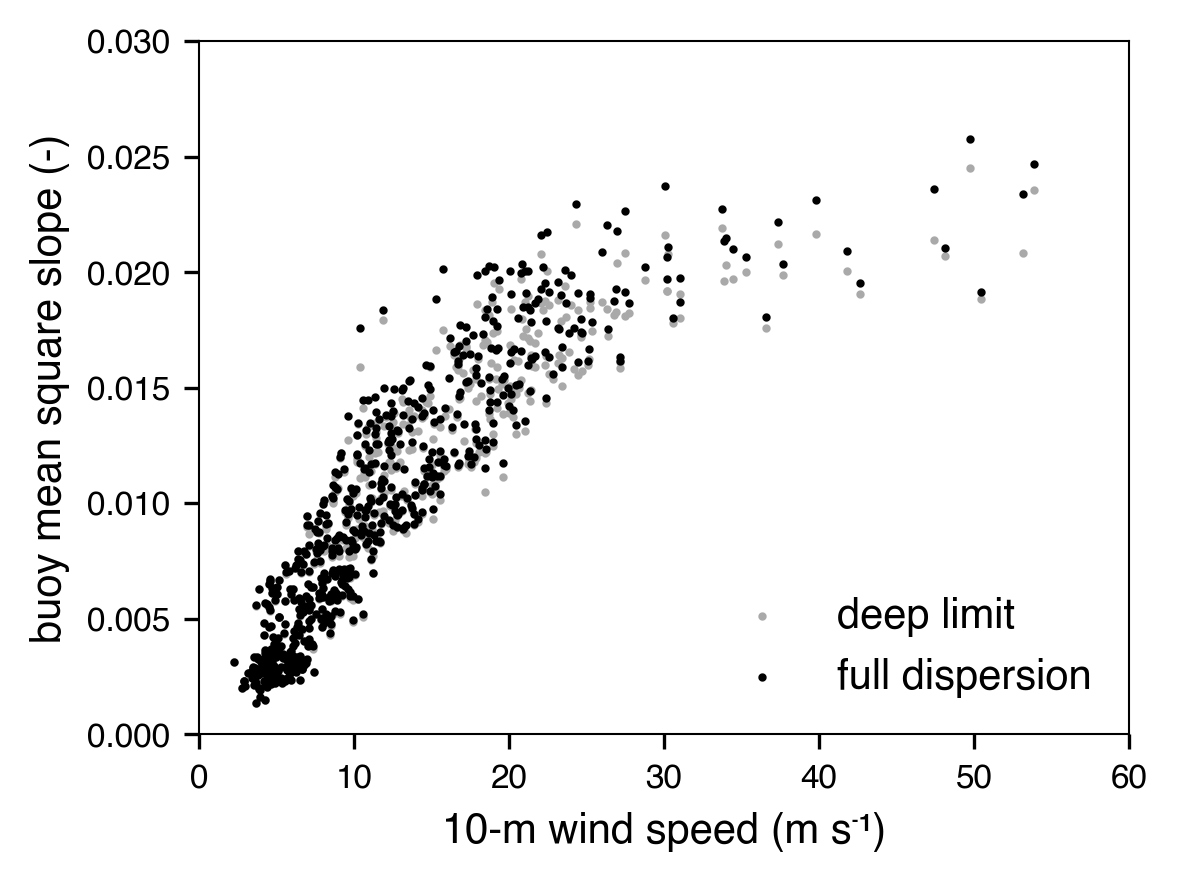

In [6]:
FIGURE_TITLE = "revfig-mean_square_slope_depth_dispersion_versus_deep_limit"
FIGURE_SIZE = (4, 3)
FIGURE_MARKER_SIZE = 1
MARKER_COLOR_DISPERSION = 'black'
MARKER_COLOR_DEEP_LIMIT = 'darkgray'
fig,ax = plt.subplots(figsize=FIGURE_SIZE)

ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'deep limit',
    color=MARKER_COLOR_DEEP_LIMIT,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic_deep_limit'],
    color=MARKER_COLOR_DEEP_LIMIT,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    label=f'full dispersion',
    color=MARKER_COLOR_DISPERSION,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    color=MARKER_COLOR_DISPERSION,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(loc='lower right', frameon=False, fontsize=10)

# fig.savefig(f"{FIGURE_TITLE}.png", bbox_inches='tight')

Compare observed and intrinsic mean square slopes versus wind speed.

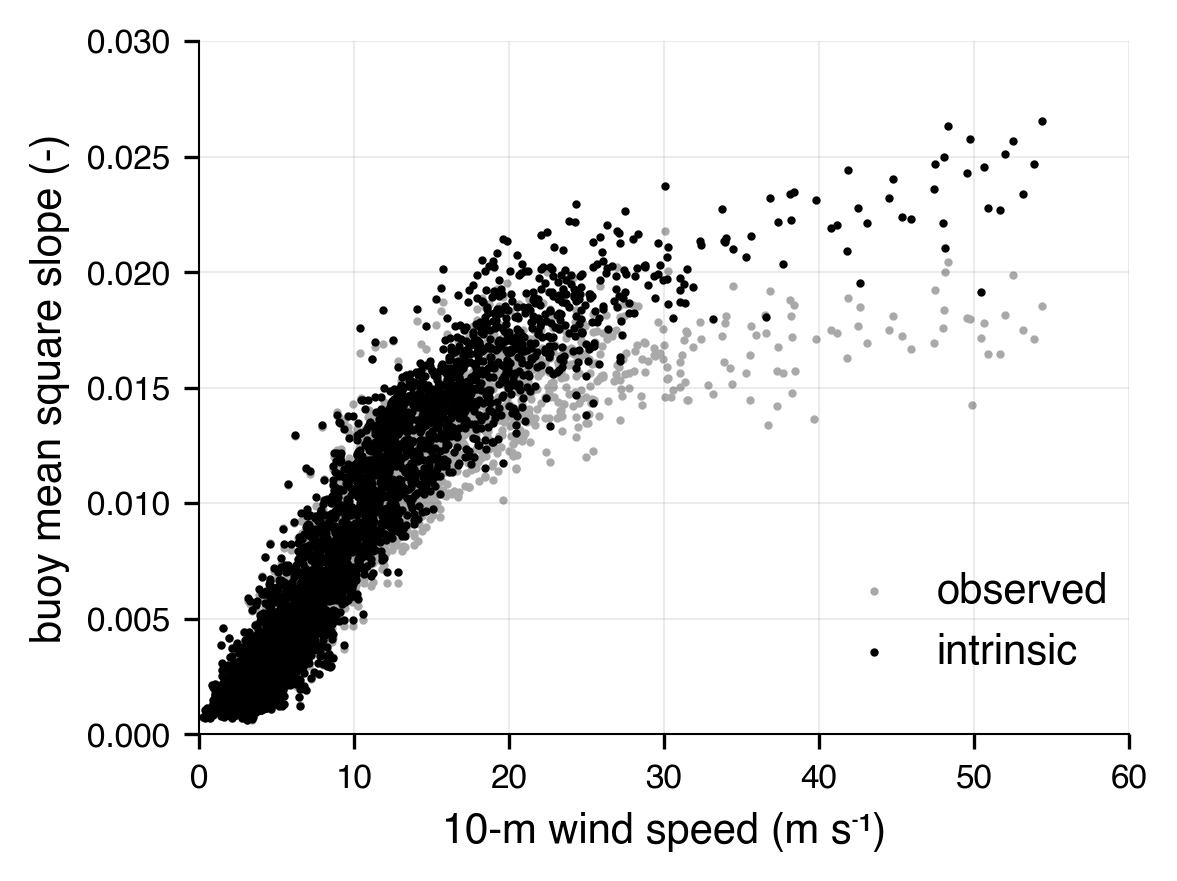

In [7]:
FIGURE_TITLE = "afig-mean_square_slope_versus_wind_speed_observed_and_intrinsic"
FIGURE_SIZE = (4, 3)
FIGURE_MARKER_SIZE = 1
MARKER_COLOR_INTRINSIC = 'black'
MARKER_COLOR_OBSERVED = 'darkgray'

fig,ax = plt.subplots(figsize=FIGURE_SIZE)

# observed
ax.scatter(
    x=fiona_spotter_coamps_df['wind_speed'],
    y=fiona_spotter_coamps_df['mean_square_slope_observed'],
    label=f'observed',
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=ian_spotter_coamps_df['wind_speed'],
    y=ian_spotter_coamps_df['mean_square_slope_observed'],
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_observed'],
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_observed'],
    color=MARKER_COLOR_OBSERVED,
    edgecolor=MARKER_COLOR_OBSERVED,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)

# intrinsic
ax.scatter(
    x=fiona_spotter_coamps_df['wind_speed'],
    y=fiona_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    label=f'intrinsic',
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=ian_spotter_coamps_df['wind_speed'],
    y=ian_spotter_coamps_df['mean_square_slope_intrinsic_deep_limit'],
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=spotter_df['wind_speed'],
    y=spotter_df['mean_square_slope_intrinsic'],
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
ax.scatter(
    x=microswift_df['wind_speed'],
    y=microswift_df['mean_square_slope_intrinsic'],
    color=MARKER_COLOR_INTRINSIC,
    edgecolor=MARKER_COLOR_INTRINSIC,
    marker='o',
    s=FIGURE_MARKER_SIZE,
)
plotting.remove_top_and_right_spines(ax)
plotting.set_gridlines(ax)

ax.set_xlim(0, 60)
ax.set_ylim(0,0.03)
ax.set_xlabel('10-m wind speed (m s\u207B\u00B9)')
ax.set_ylabel('buoy mean square slope (-)')
ax.legend(
    loc='lower right',
    frameon=False,
    fontsize=10,
    bbox_to_anchor=[1, 0.06],
    handletextpad=0.5,
    borderpad=0,
)

# fig.savefig(f"{FIGURE_TITLE}.png", bbox_inches='tight')

**Appendix Figure:** Observed and intrinsic mean square slope (0.05 Hz to 0.5 Hz) versus wind speed.  The data include observations from Hurricane Idalia (this study) and Hurricanes Ian and Fiona (Davis et al., 2023).

## Fitting

Combine mean square slope and wind speed data from each buoy in to a single DataFrame, `fit_df`.

In [8]:
spotter_fit_data = (spotter_df[['wind_speed', 'mean_square_slope_intrinsic']]
                    .dropna()
                    .sort_values(by='wind_speed', axis=0))

microswift_fit_data = (microswift_df[['wind_speed', 'mean_square_slope_intrinsic']]
                       .dropna()
                       .sort_values(by='wind_speed', axis=0))

fit_df = pd.concat((spotter_fit_data, microswift_fit_data))
fit_df.sort_values(by='wind_speed', axis=0, inplace=True)

Fit a $a\tanh(b U_{10}) + c$ function to the mean square slope versus wind speed data.

In [9]:
def mss_tanh_fit(u, a, b, c):
     return a*np.tanh(b*u) + c
p0 = [0.02, 0.05, 0]
variable_names = ['a', 'b', 'c']

Fit the function using nonlinear least squares.  Here `popt` are the optimal parameters ($a$, $b$, $c$) and `pcov` is the estimated approximate covariance of the parameters.

In [10]:
tanh_fit = {
     'fun': mss_tanh_fit,
     'p0': p0,
     'vars': variable_names,
}

# fit the model
tanh_fit['popt'], tanh_fit['pcov'] = curve_fit(
   tanh_fit['fun'],
   xdata=fit_df['wind_speed'],
   ydata=fit_df['mean_square_slope_intrinsic'],
   p0=tanh_fit['p0'],
)

# Approximate parameter confidence intervals using the covariance matrix.
tanh_fit['perr'], tanh_fit['t_value'], tanh_fit['popt_upper'], tanh_fit['popt_lower'] \
   = stats.parameter_confidence_intervals(
    popt=tanh_fit['popt'],
    pcov=tanh_fit['pcov'],
    n=len(fit_df['mean_square_slope_intrinsic']),
    alpha=0.05,  # 95% confidence interval
)

# Calculate the RMSE.
fit_df['tanh_fit'] = tanh_fit['fun'](fit_df['wind_speed'], *tanh_fit['popt'])
tanh_fit['rmse'] = stats.root_mean_square_error(
   y=fit_df['mean_square_slope_intrinsic'],
   y_hat=fit_df['tanh_fit']
)

# Calculate residuals.
fit_df['tanh_fit_residuals'] = fit_df['mean_square_slope_intrinsic'] - fit_df['tanh_fit']

Print the coefficients.

In [11]:
# Parameters +/- 95% confidence intervals.
stats.print_fit_parameters(tanh_fit, print_format='0.4f')

# Root mean square error.
print(f'RMSE: {tanh_fit["rmse"]:.5f}')

# Upper and lower wind speeds.
print(f'Valid U_{10} range: {fit_df['wind_speed'].min():0.0f} m/s '
      f'to {fit_df['wind_speed'].max():0.0f} m/s')


a: 0.0250 +/- 0.0009
b: 0.0476 +/- 0.0039
c: -0.0020 +/- 0.0006
RMSE: 0.00201
Valid U_10 range: 2 m/s to 54 m/s


Here, uncertainties represent 95\% confidence intervals on the parameters derived from the covariance matrix estimated during the nonlinear least squares fitting.  These coefficients are valid for $U_{10} \in [2, 52]$ m/s and for an mss integrated over frequencies from 0.05 Hz to 0.5 Hz (624 m to 6.2 m wavelength).

Plot the fit on top of the original data and plot the residuals.

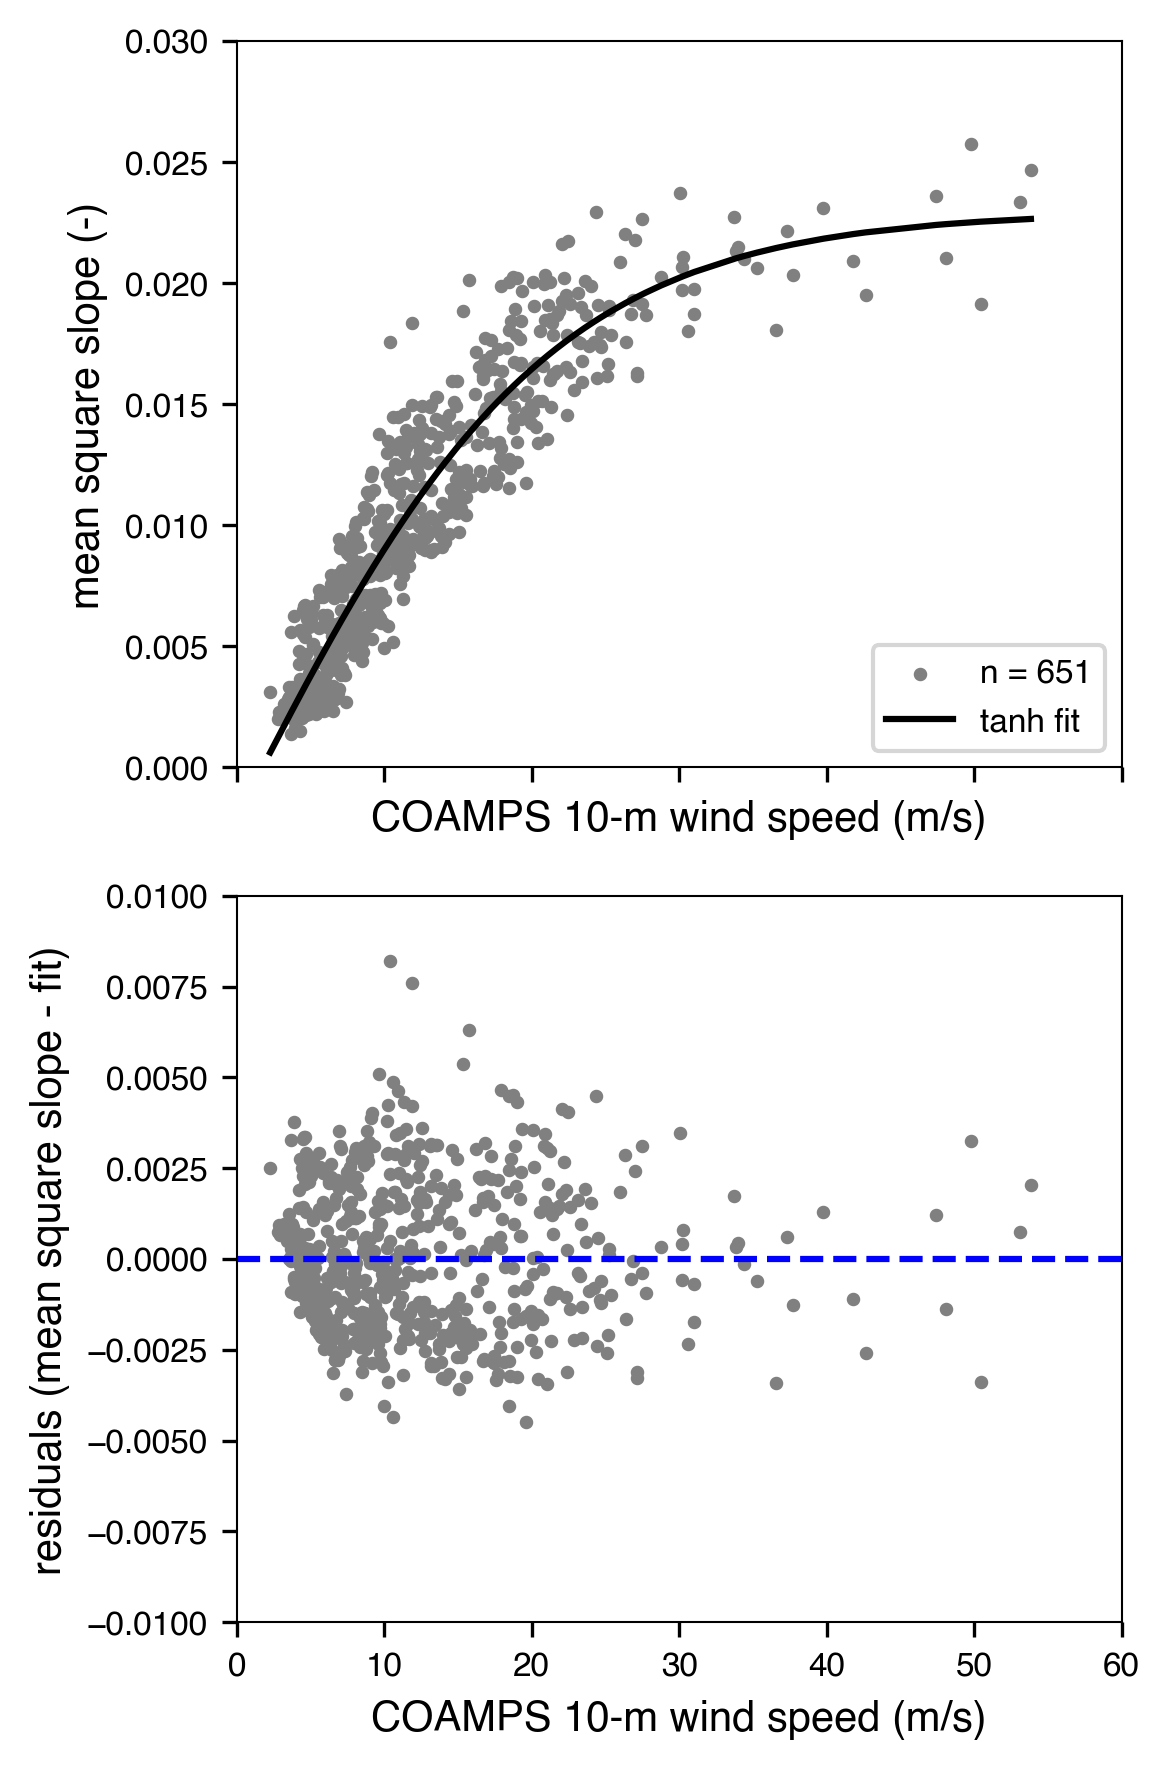

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(4, 6), sharex=True)

# fit plot
ax[0].scatter(
    fit_df['wind_speed'],
    fit_df['mean_square_slope_intrinsic'],
    s=5,
    color='grey',
    label=f'n = {fit_df["mean_square_slope_intrinsic"].size}'
)
ax[0].plot(
    fit_df['wind_speed'],
    fit_df['tanh_fit'],
    color='k',
    label='tanh fit'
)
ax[0].set_xlabel('COAMPS 10-m wind speed (m/s)')
ax[0].set_ylabel('mean square slope (-)')
ax[0].legend(frameon=True, loc='lower right')
ax[0].set_ylim([0, 0.03])

# residual plot
ax[1].scatter(
    fit_df['wind_speed'],
    fit_df['tanh_fit_residuals'],
    s=5,
    color='grey',
)
ax[1].set_xlabel('COAMPS 10-m wind speed (m/s)')
ax[1].set_ylabel('residuals (mean square slope - fit)')
ax[1].axhline(0, color='b', linestyle='--')
ax[1].set_ylim(0.01 * np.array([-1, 1]))
ax[1].set_xlim([0, 60])

fig.tight_layout()
# fig.savefig('idalia_mss_fit_and_residuals_spotter_only.png', dpi=400)

Calculate the residuals (observations minus fit) for each buoy observation and add it to the DataFrame.

In [13]:
spotter_df['mean_square_slope_intrinsic_residual'] = stats.calculate_residuals(
    spotter_df['mean_square_slope_intrinsic'],
    spotter_df['wind_speed'],
    tanh_fit['fun'],
     *tanh_fit['popt'],
)

microswift_df['mean_square_slope_intrinsic_residual'] = stats.calculate_residuals(
    microswift_df['mean_square_slope_intrinsic'],
    microswift_df['wind_speed'],
    tanh_fit['fun'],
    *tanh_fit['popt'],
)

/var/folders/5k/tj9m5nbs0rb__4sp5qh876yc0000gn/T/ipykernel_96196/1762315965.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  spotter_df['mean_square_slope_intrinsic_residual'] = stats.calculate_residuals(


## COAMPS-TC wind speed validation

Compare COAMPS-TC surface wind speeds with SFMR surface wind speeds collected during NOAA and Air Force flights.  The difference between SFMR and COAMPS-TC will be used to quantify error as a function of wind speed.

Plot flight tracks with SFMR surface wind speed estimates.

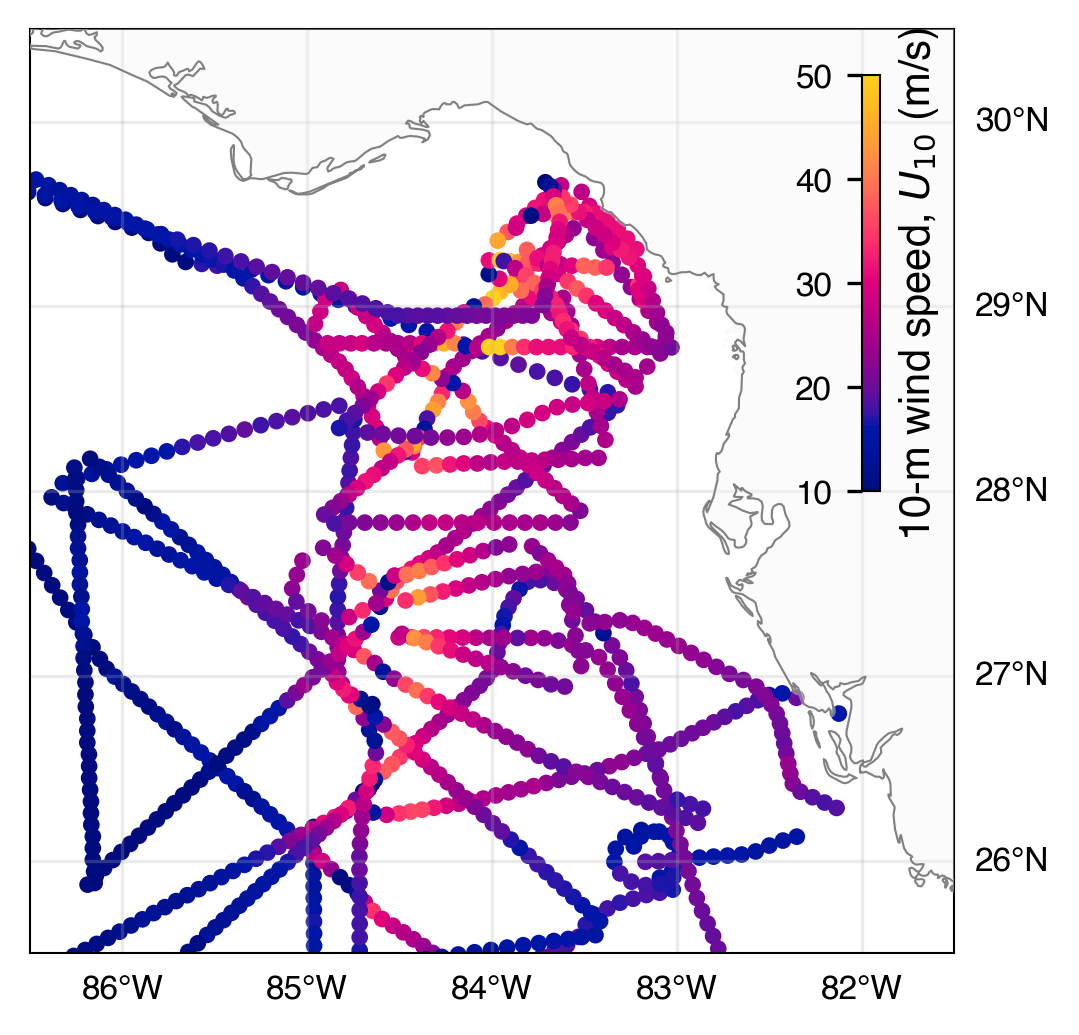

In [14]:
CRS = cartopy.crs.PlateCarree()
FIG_SIZE = (4.5, 4)
EXTENT = [-86.5, -81.5, 25.5, 30.5]

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)

# Plot the base Cartopy map
plotting.plot_base_chart(
    ax,
    extent=EXTENT,
)

sfmr_plot_kwargs = dict(
    s=5,
)

sfmr_plot = ax.scatter(
    sfmr_ds['longitude'],
    sfmr_ds['latitude'],
    c=sfmr_ds['sfmr_10m_wind_speed'],
    **plotting.wind_speed_plot_kwargs,
)

cax = ax.inset_axes([0.9, 0.5, 0.02, 0.45], axes_class=mpl.axes.Axes)
cbar = plt.colorbar(sfmr_plot, cax=cax)
cax.yaxis.set_ticks_position('left')
cbar.set_label('10-m wind speed, $U_{10}$ (m/s)')
# fig.savefig('revfig-sfmr_flight_tracks.png', dpi=400, bbox_inches='tight')


Plot an example time series.

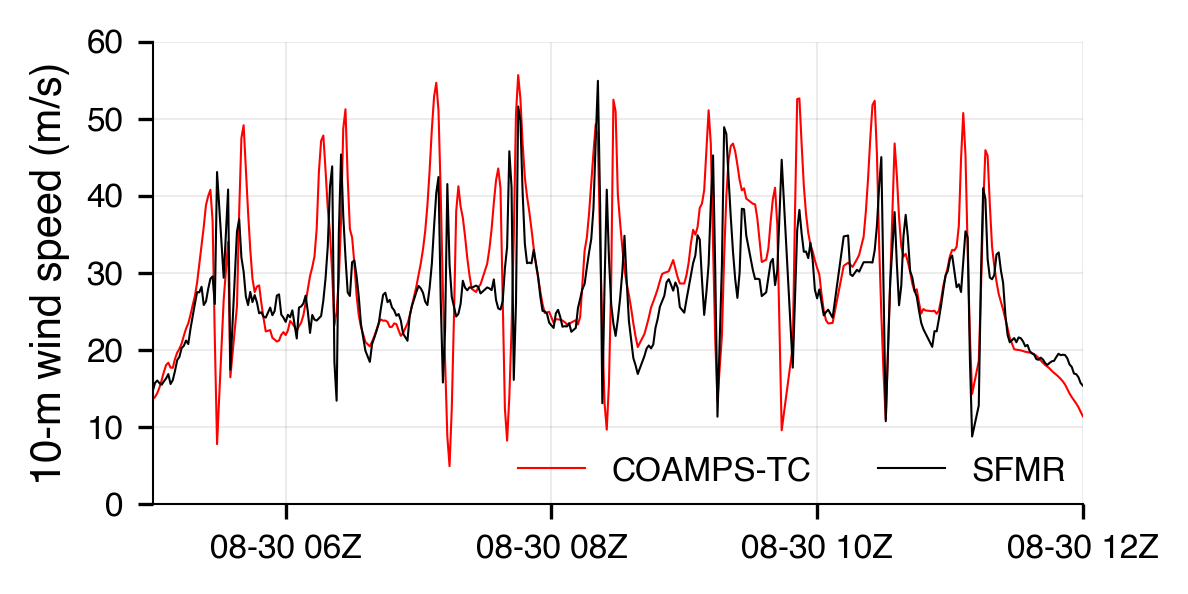

In [15]:
FIG_SIZE = (4, 2)

def plot_coamps_sfmr_time_series(
    ax,
    sfmr_ds,
    coamps_ds,
    time_slice,
):
    ax.plot(
        sfmr_ds.sel(datetime=time_slice)['datetime'],
        sfmr_ds.sel(datetime=time_slice)['coamps_10m_wind_speed'],
        linewidth=0.5,
        color='r',
        label='COAMPS-TC',
    )
    ax.plot(
        sfmr_ds.sel(datetime=time_slice)['datetime'],
        sfmr_ds.sel(datetime=time_slice)['sfmr_10m_wind_speed'],
        linewidth=0.5,
        color='k',
        label='SFMR',
    )
    ax.set_ylabel('10-m wind speed (m/s)')
    ax.legend(
        frameon=False,
        ncol=2,
        bbox_to_anchor=[1, 0],
        loc='lower right',
        borderpad=0,
    )
    ax.set_ylim([0, 60])
    plotting.set_gridlines(ax)
    plotting.remove_top_and_right_spines(ax)
    plotting.set_time_series_xaxis(
        ax,
        time_slice.start + pd.Timedelta('1h'),
        time_slice.stop,
        freq='2h'
    )
    ax.set_xlim(time_slice.start, time_slice.stop)

start_date = pd.Timestamp('2023-08-30T05:00', tz=None)
end_date = pd.Timestamp('2023-08-30T12:00', tz=None)
time_slice = slice(start_date, end_date)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_sfmr_time_series(ax, sfmr_ds, coamps_ds, time_slice)



Filter the SFMR and COAMPS-TC surface wind speeds used in the validation.  Wind speeds > 10 m/s will be used (SFMR is not reliable at low wind speeds).

In [16]:
# SFMR is accurate accurate above moderate wind speeds.
min_wind_speed = 10  # m/s
above_min_wind_speed = np.logical_and(sfmr_ds['coamps_10m_wind_speed'] > min_wind_speed, sfmr_ds['sfmr_10m_wind_speed'] > min_wind_speed)

# Drop NaNs
not_nan = np.logical_and(~sfmr_ds['coamps_10m_wind_speed'].isnull(), ~sfmr_ds['sfmr_10m_wind_speed'].isnull())
is_valid = not_nan & above_min_wind_speed
coamps_sfmr_wind = sfmr_ds['coamps_10m_wind_speed'].where(is_valid, drop=True)
sfmr_wind = sfmr_ds['sfmr_10m_wind_speed'].where(is_valid, drop=True)

Calculate wind speed error relative to SFMR.

In [17]:
# error = forecast_value - observed_values
error = coamps_sfmr_wind - sfmr_wind

In [18]:
print(f'n = {len(error)}')

n = 1289


Plot an error histogram.

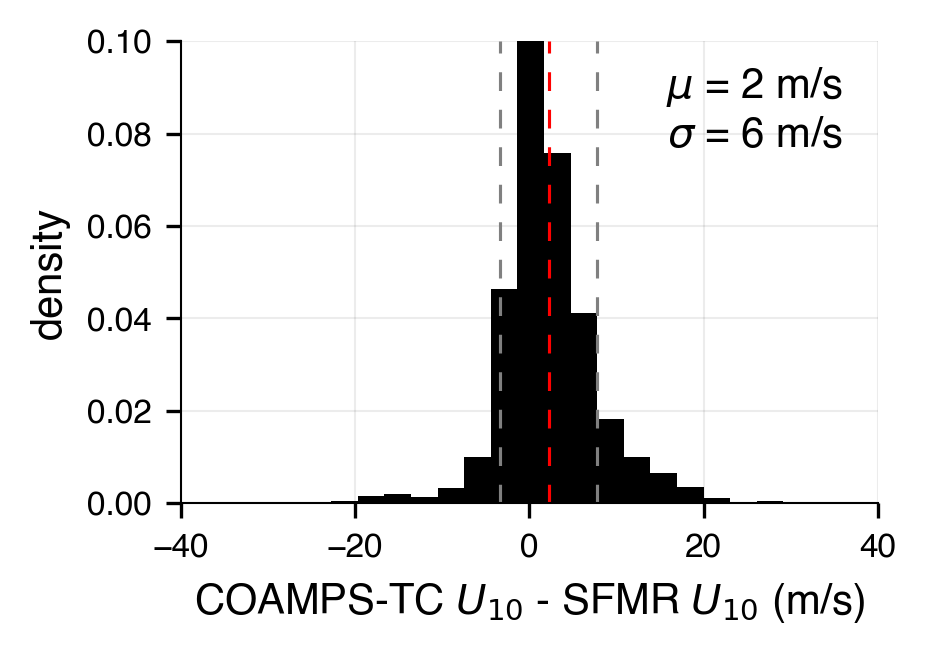

In [19]:
FIG_SIZE = (3, 2)

def plot_coamps_sfmr_histogram(ax, error):
    ax.hist(error, color='k', density=True, bins=20)
    ax.set_xlabel('COAMPS-TC $U_{10}$ - SFMR $U_{10}$ (m/s)')
    ax.set_ylabel('density')
    ax.set_xlim(40 * np.array([-1, 1]))
    ax.set_ylim(0, 0.1)
    stat_line_kwargs = {
        'linestyle': '--',
        'linewidth': 0.75,
        'dashes': (6, 6),
    }
    ax.axvline(error.mean(), color='r', **stat_line_kwargs)
    ax.axvline(error.mean() + error.std(), color='grey', **stat_line_kwargs)
    ax.axvline(error.mean() - error.std(), color='grey', **stat_line_kwargs)
    ax.annotate(r'$\mu$' + f' = {error.mean():0.0f} m/s\n'
                r'$\sigma$' + f' = {error.std():0.0f} m/s',
                (0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
    plotting.remove_top_and_right_spines(ax)
    plotting.set_gridlines(ax)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_sfmr_histogram(ax, error)

# fig.savefig('revfig-coamps_error_histogram.png', dpi=400, bbox_inches='tight')

Esimate the bias and error in 10 m/s wind speed bins.

In [20]:
WIND_SPEED_BIN_SIZE = 10
MINIMUM_BIN_EDGE = 15
MAXIMUM_BIN_EDGE = 55

wind_speed_bins = np.arange(MINIMUM_BIN_EDGE, MAXIMUM_BIN_EDGE+WIND_SPEED_BIN_SIZE, WIND_SPEED_BIN_SIZE)
wind_speed_bin_centers = wind_speed_bins[:-1] + np.diff(wind_speed_bins)/2
wind_speed_bin_counts = error.groupby_bins(group=sfmr_wind, bins=wind_speed_bins).count().values
wind_speed_bin_error_mean = error.groupby_bins(group=sfmr_wind, bins=wind_speed_bins).apply(np.mean)
wind_speed_bin_error_std = error.groupby_bins(group=sfmr_wind, bins=wind_speed_bins).apply(np.std)

error_std_percentage_in_bin = wind_speed_bin_error_std / wind_speed_bin_centers * 100

print(f'wind speed bin edges: {wind_speed_bins} m/s')
print(f'wind speed bin centers: {wind_speed_bin_centers.round(0)} m/s')
print(f'wind speed bin counts: {wind_speed_bin_counts}')
print(f'error mean in bin: {wind_speed_bin_error_mean.values.round(0)} m/s')
print(f'error stdev in bin: {wind_speed_bin_error_std.values.round(0)} m/s')
print(f'error stdev % of wind speed in bin: {error_std_percentage_in_bin.values.round(0)} %')

wind speed bin edges: [15 25 35 45 55] m/s
wind speed bin centers: [20. 30. 40. 50.] m/s
wind speed bin counts: [673 305  56  10]
error mean in bin: [  2.   3.   2. -10.] m/s
error stdev in bin: [ 5.  7.  8. 11.] m/s
error stdev % of wind speed in bin: [23. 24. 19. 22.] %


(0.0, 15.0)

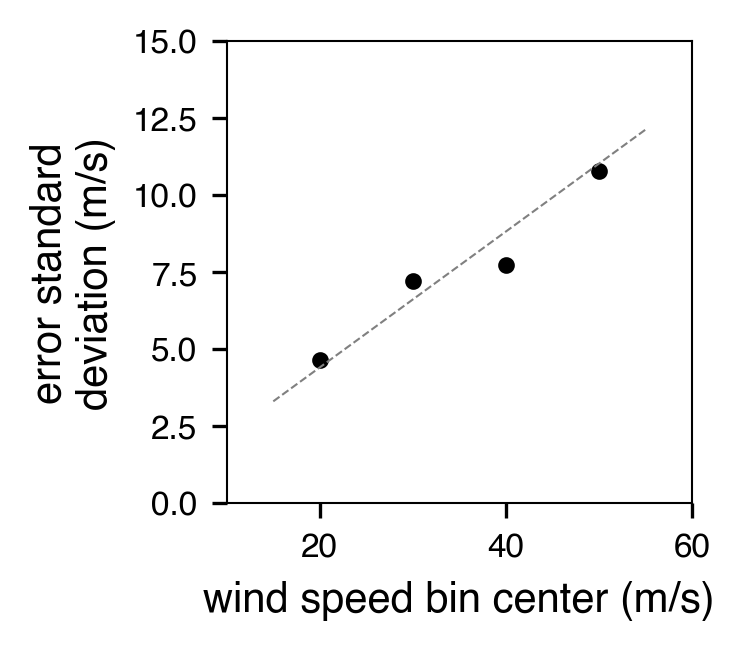

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.scatter(
    wind_speed_bin_centers,
    wind_speed_bin_error_std,
    color='k',
)
# ax.plot(wind_speed_bin_centers, wind_speed_bin_centers*0.25)
ax.plot(
    np.array([15, 55]),
    np.array([15, 55]) * error_std_percentage_in_bin.mean().item()/100,
    color='grey',
    linestyle='--',
    linewidth=0.5
)
ax.set_xlabel('wind speed bin center (m/s)')
ax.set_ylabel('error standard\ndeviation (m/s)')
ax.set_xlim([10, 60])
ax.set_ylim([0, 15])
# fig.savefig('revfig-coamps_error_versus_wind_speed.png', dpi=400, bbox_inches='tight')


Plot SMFR surface wind speed versus COAMPS-TC surface wind speed as a 2D histogram and scatter plot.

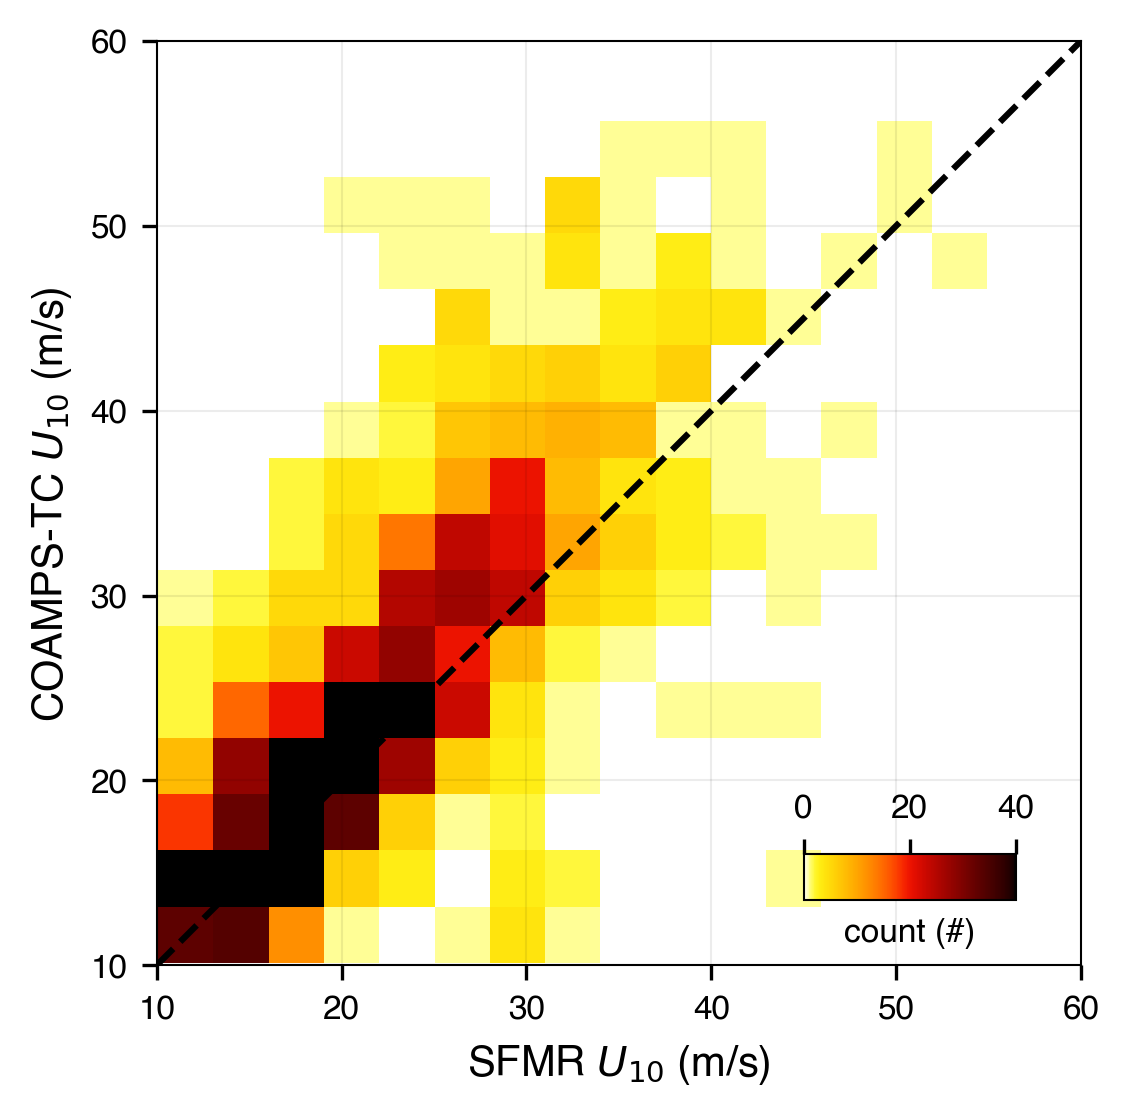

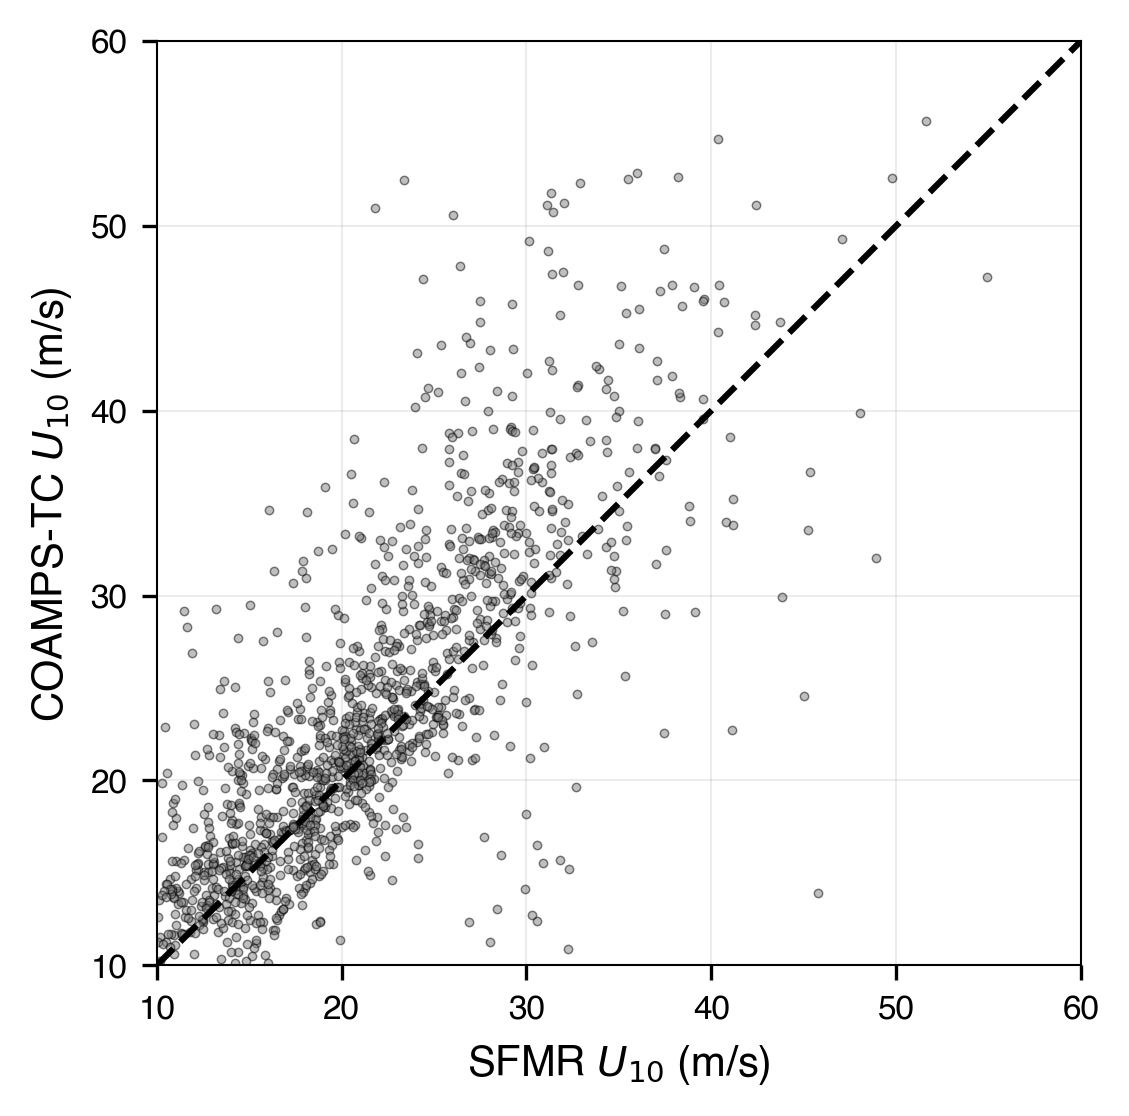

In [59]:
FIG_SIZE = (4, 4)

def plot_coamps_sfmr_2dhist(
    ax,
    coamps_sfmr_wind,
    sfmr_wind,
):
    cmap = colorcet.cm.fire_r
    norm = mpl.colors.Normalize(vmin=0, vmax=40)

    hist_plot = ax.hist2d(
        sfmr_wind,
        coamps_sfmr_wind,
        bins=(15, 15),
        cmap=cmap,
        norm=norm,
    )
    axes_limits = [10, 60]
    ax.set_ylim(axes_limits)
    ax.set_xlim(axes_limits)
    ax.plot(axes_limits, axes_limits, color='k', linestyle='--')
    ax.set_aspect('equal')
    ax.set_xlabel('SFMR $U_{10}$ (m/s)')
    ax.set_ylabel('COAMPS-TC $U_{10}$ (m/s)')

    # cax = fig.add_axes([0.95, 0.11, 0.05, 0.33])  # [left, bottom, width, height]
    # cbar = fig.colorbar(hist_plot[3], ax=ax, cax=cax)


    cbar, cax = plotting.create_inset_colorbar(hist_plot[3], ax=ax, bounds=[0.7, 0.07, 0.23, 0.05], orientation='horizontal')
    cax.xaxis.set_ticks_position('top')
    cax.set_xticks([norm.vmin, (norm.vmin + norm.vmax)/2, norm.vmax])
    cax.xaxis.set_tick_params(labelsize=plotting.small_font_size)
    cbar.set_label('count (#)', fontsize=plotting.small_font_size)
    
    plotting.set_gridlines(ax)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_sfmr_2dhist(ax, coamps_sfmr_wind, sfmr_wind)
# fig.savefig('revfig-sfmr_and_coamps_wind_speed_comparison.png', dpi=400, bbox_inches='tight')


def plot_coamps_sfmr_scatter(
    ax,
    coamps_sfmr_wind,
    sfmr_wind,
):
    ax.scatter(
        sfmr_wind,
        coamps_sfmr_wind,
        edgecolors='k',
        facecolors='grey',
        marker='o',
        s=4,
        linewidth=0.35,
        alpha=0.5,
    )
    axes_limits = [10, 60]
    ax.set_ylim(axes_limits)
    ax.set_xlim(axes_limits)
    ax.plot(axes_limits, axes_limits, color='k', linestyle='--')
    ax.set_aspect('equal')
    ax.set_xlabel('SFMR $U_{10}$ (m/s)')
    ax.set_ylabel('COAMPS-TC $U_{10}$ (m/s)')
    plotting.set_gridlines(ax)


fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_sfmr_scatter(ax, coamps_sfmr_wind, sfmr_wind)
# fig.savefig('revfig-sfmr_and_coamps_wind_speed_comparison.png', dpi=400, bbox_inches='tight')


Plot errors in a storm-centered, RMW-normalized reference frame.  This would reveal error asymmetries with respect to the center (i.e., if errors are higher in one quadrant compared to another).

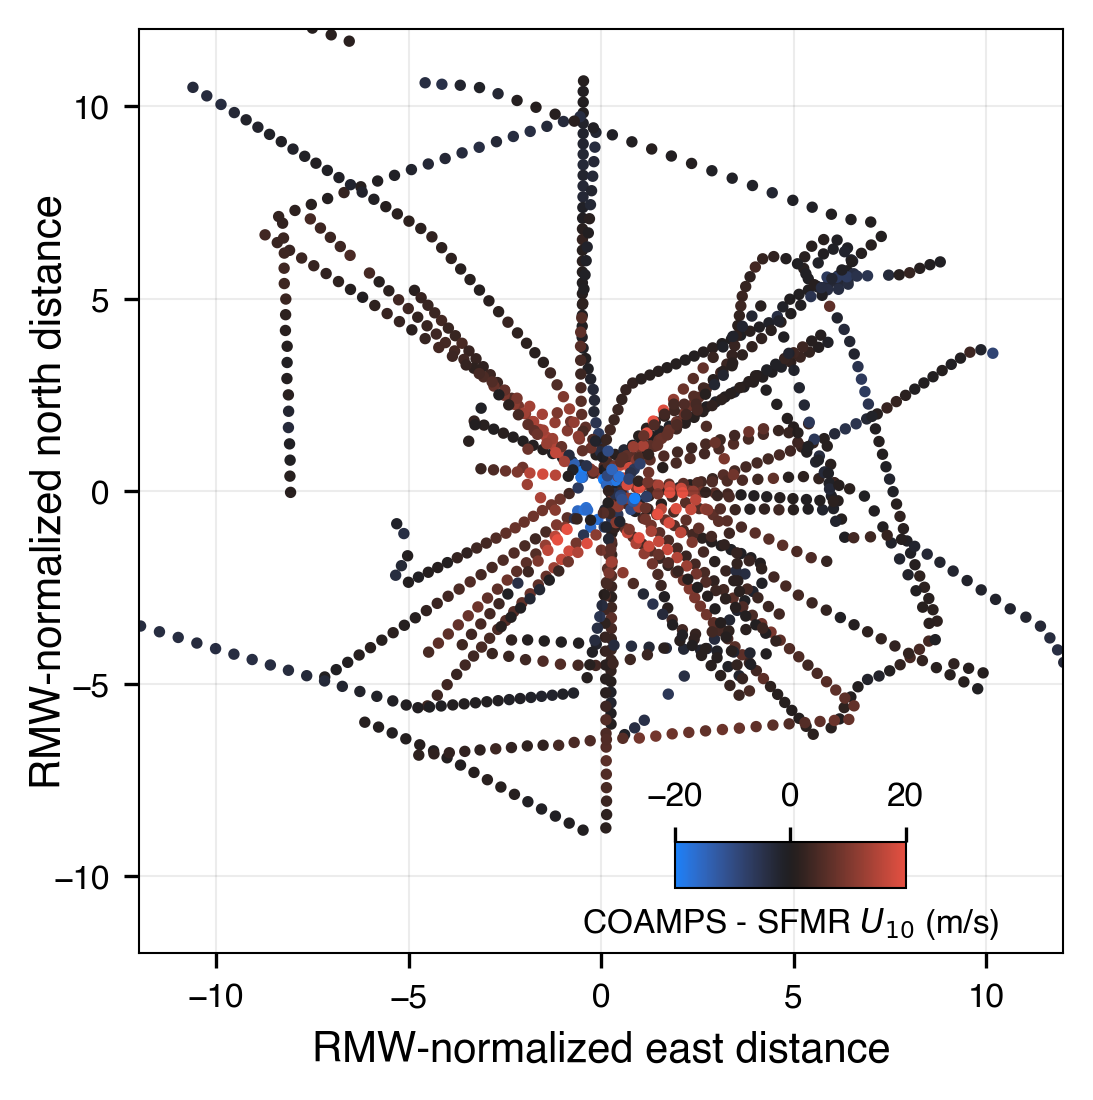

In [ ]:
FIG_SIZE = (4, 4)

def plot_coamps_sfmr_storm_frame(
    ax,
    sfmr_ds,
):
    norm = mpl.colors.Normalize(vmin=-20, vmax=20)
    cmap = colorcet.cm.bkr

    sfmr_plot = ax.scatter(
        sfmr_ds.where(is_valid, drop=True)['storm_distance_east_normalized'],
        sfmr_ds.where(is_valid, drop=True)['storm_distance_north_normalized'],
        c=error,
        norm=norm,
        cmap=cmap,
        s=3,
    )

    # cax = ax.inset_axes([0.93, 0.5, 0.02, 0.45], axes_class=mpl.axes.Axes)
    cbar, cax = plotting.create_inset_colorbar(sfmr_plot, ax=ax, bounds=[0.58, 0.07, 0.25, 0.05], orientation='horizontal')
    cax.xaxis.set_ticks_position('top')
    cbar.set_label('COAMPS - SFMR $U_{10}$ (m/s)',
                   fontsize=plotting.small_font_size)
    ax.set_xlim(12 * np.array([-1, 1]))
    ax.set_ylim(12 * np.array([-1, 1]))
    ax.set_xlabel('RMW-normalized east distance')
    ax.set_ylabel('RMW-normalized north distance', labelpad=-4)
    plotting.set_gridlines(ax)
    plotting.set_square_aspect(ax)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_sfmr_storm_frame(ax, sfmr_ds)

# fig.savefig('revfig-coamps_error_storm_frame.png', dpi=400, bbox_inches='tight')

Errors tend to be symmetric about the center, but vary radially. This indicates storm structure varies between COAMPS-TC and that measured by SFMR.

Create a combined plot with the wind speed time series comparison and error histogram. This figure will be included in the appendix.

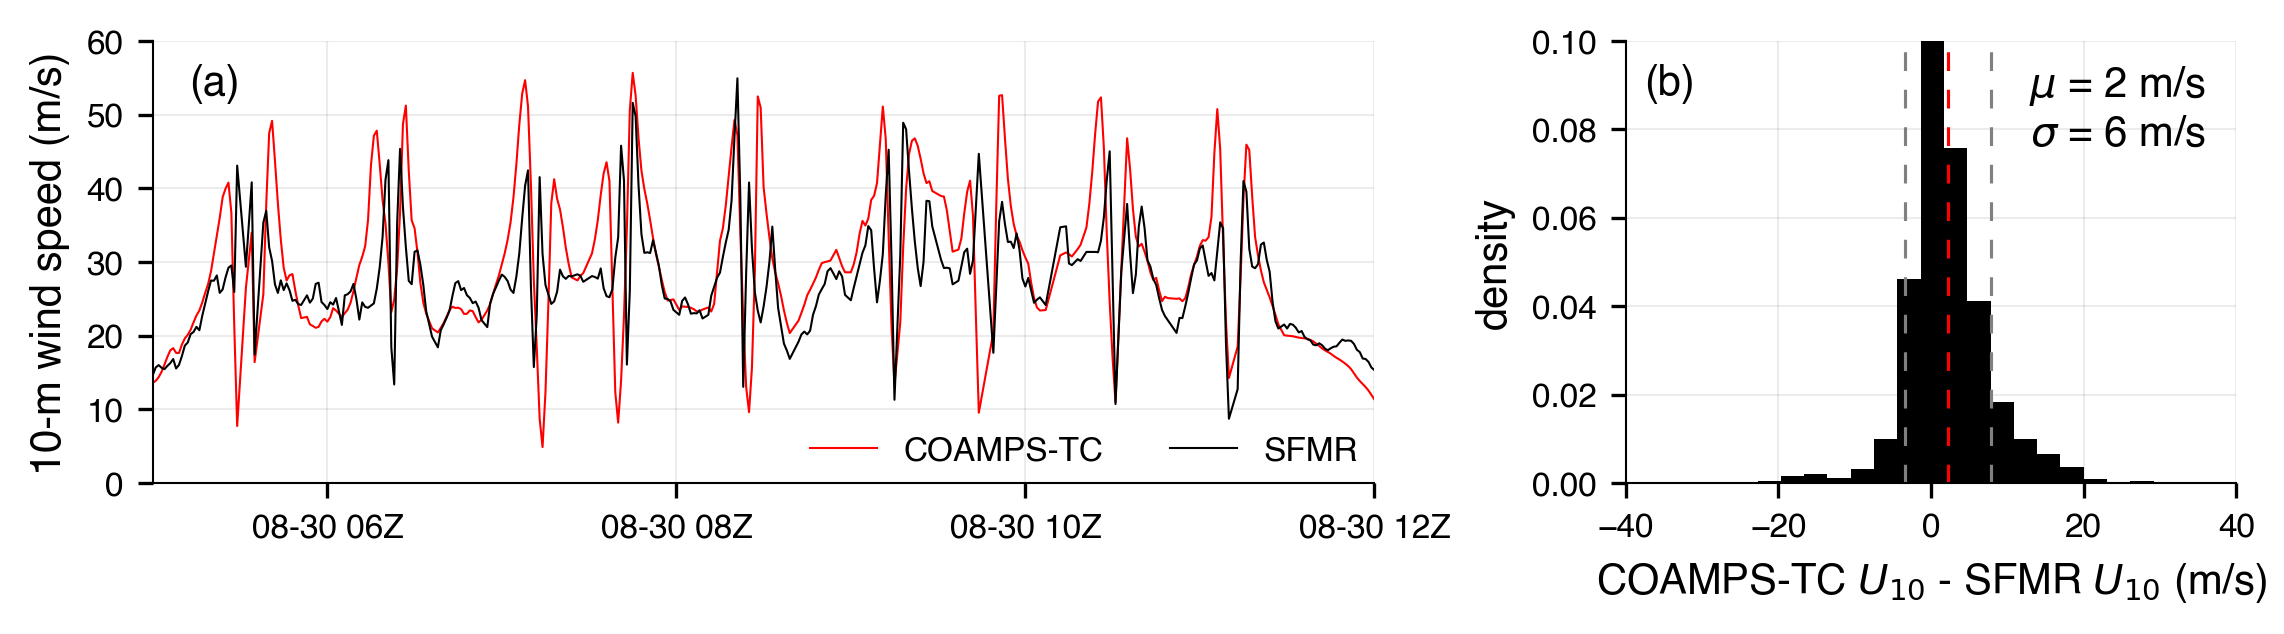

In [ ]:
FIG_TITLE = ("afig-coamps_sfmr_time_series")
FIG_SIZE = (7.5, 2)

gs_kwargs = dict(
    width_ratios=[2, 1],
)
label_kwargs = dict(loc='upper left', nudge_x=-0.02, nudge_y=0.00)

fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

start_date = pd.Timestamp('2023-08-30T05:00', tz=None)
end_date = pd.Timestamp('2023-08-30T12:00', tz=None)
time_slice = slice(start_date, end_date)

ax = next(axes_iter)
plot_coamps_sfmr_time_series(ax, sfmr_ds, coamps_ds, time_slice)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
plot_coamps_sfmr_histogram(ax, error)
labeler.add_label(ax, **label_kwargs)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')


Create a combined plot with the 1:1 and storm-centered comparisons.

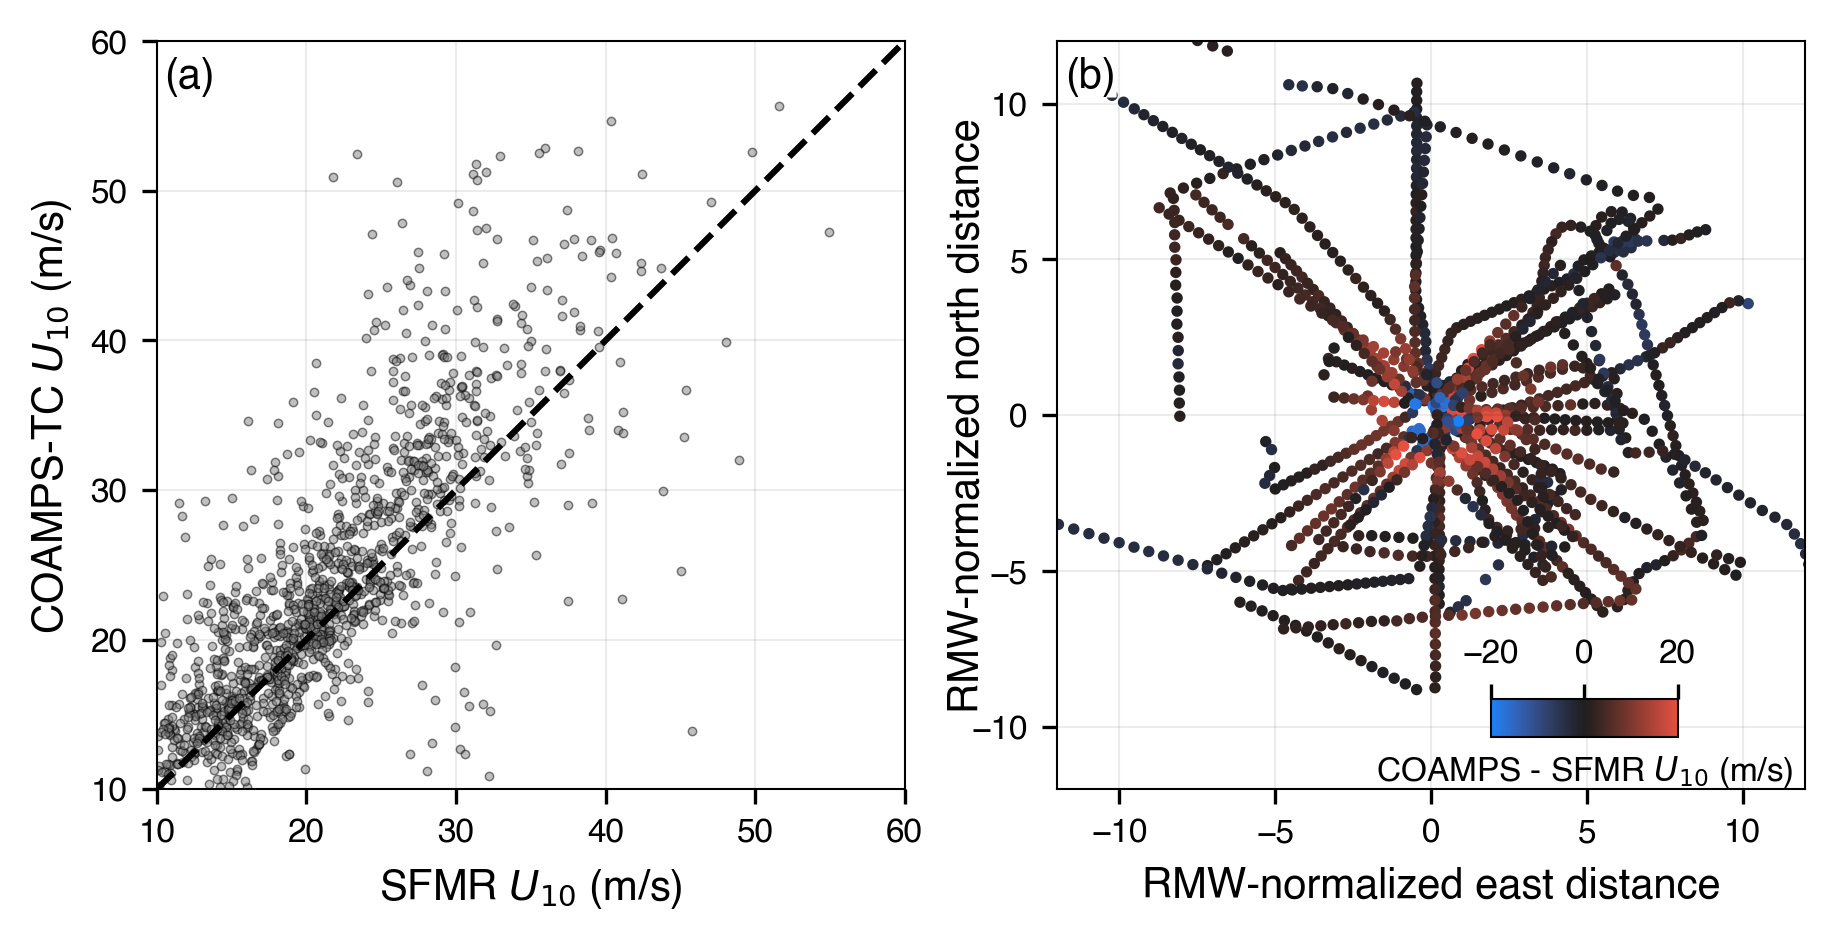

In [62]:
FIG_TITLE = ("afig-coamps_sfmr_errors")
FIG_SIZE = (6, 3.5)

gs_kwargs = dict(
    width_ratios=[1, 1],
    # height_ratios=[1, 1],
)
label_kwargs = dict(
    loc='upper left',
    nudge_x=-0.04,
    nudge_y=0.03,
    bbox=dict(facecolor='w', edgecolor='none', boxstyle='round', pad=0.03,)
)

fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
)

labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

ax = next(axes_iter)
# plot_coamps_sfmr_2dhist(ax, coamps_sfmr_wind, sfmr_wind)
plot_coamps_sfmr_scatter(ax, coamps_sfmr_wind, sfmr_wind)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
plot_coamps_sfmr_storm_frame(ax, sfmr_ds)
labeler.add_label(ax, **label_kwargs)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')


### NDBC

Compare COAMPS-TC surface wind speeds with NDBC 3.8-m wind speeds.

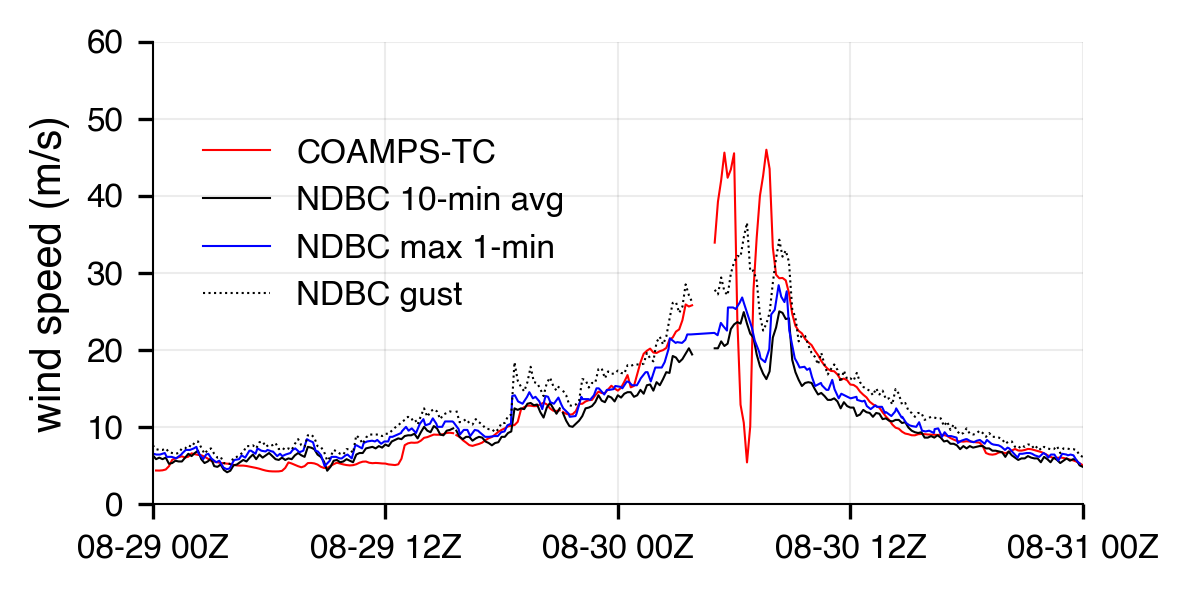

In [115]:
FIG_SIZE = (4, 2)

def plot_coamps_ndbc_time_series(
    ax,
    ndbc_ds,
):
    ax.plot(
        ndbc_ds['time'],
        ndbc_ds['coamps_10m_wind_speed'],
        linewidth=0.5,
        color='r',
        label='COAMPS-TC',
    )
    ax.plot(
        ndbc_ds['time'],
        ndbc_ds['wind_speed_primary_sensor'],
        linewidth=0.5,
        color='k',
        label='NDBC 10-min avg',
    )
    ax.plot(
        ndbc_ds['max_1_minute_wind_speed_primary_sensor'].dropna(dim='timem')['timem'],
        ndbc_ds['max_1_minute_wind_speed_primary_sensor'].dropna(dim='timem'),
        linewidth=0.5,
        linestyle='-',
        color='b',
        label='NDBC max 1-min',
    )
    ax.plot(
        ndbc_ds['time'],
        ndbc_ds['wind_gust_primary_sensor'],
        linewidth=0.5,
        linestyle=':',
        color='k',
        label='NDBC gust',
    )
    plotting.set_time_series_xaxis(
        ax,
        pd.Timestamp('2023-08-29T00:00'),
        pd.Timestamp('2023-08-31T00:00'),
        freq='12h'
    )
    ax.set_ylabel('wind speed (m/s)')
    ax.legend(
        frameon=False,
        ncol=1,
        bbox_to_anchor=[0, 0.90],
        loc='upper left',
        borderpad=1,
    )
    ax.set_ylim([0, 60])
    plotting.set_gridlines(ax)
    plotting.remove_top_and_right_spines(ax)


fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_ndbc_time_series(ax, ndbc_ds)


In [116]:
ndbc_ds['wind_speed_primary_sensor'].max().item()
print(f'NDBC max 10-min avg: {ndbc_ds['wind_speed_primary_sensor'].max().item()}')
print(f'NDBC max 1-min max: {ndbc_ds['max_1_minute_wind_speed_primary_sensor'].max().item()}')
print(f'NDBC max gust: {ndbc_ds['wind_gust_primary_sensor'].max().item()}')

NDBC max 10-min avg: 25.0
NDBC max 1-min max: 28.399999618530273
NDBC max gust: 36.5


In [117]:
error_ndbc = ndbc_ds['coamps_10m_wind_speed'] - ndbc_ds['wind_speed_primary_sensor']

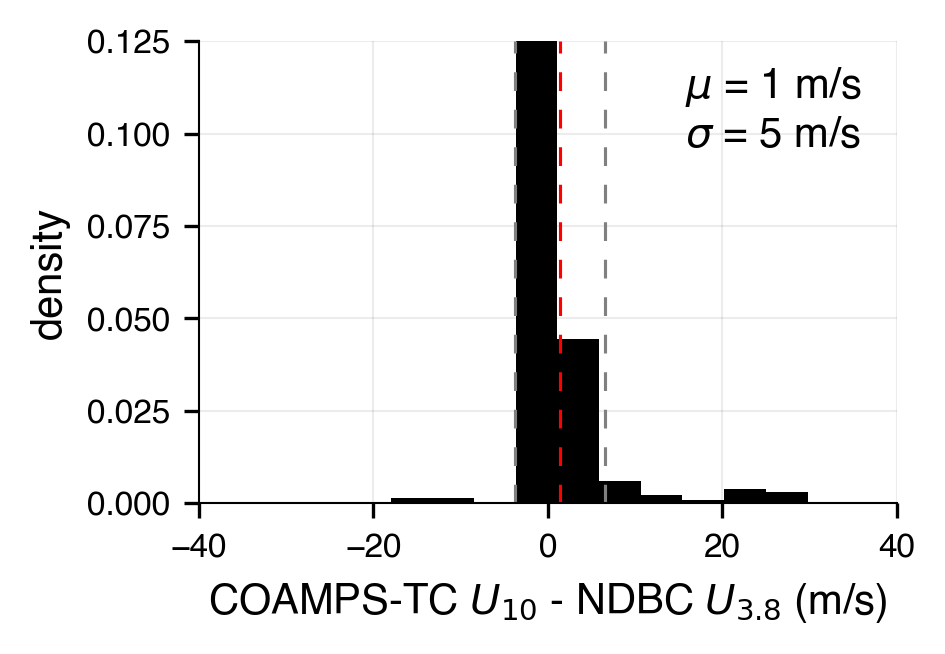

In [118]:
FIG_SIZE = (3, 2)

def plot_coamps_ndbc_histogram(ax, error):
    ax.hist(error, color='k', density=True, bins=10)
    ax.set_xlabel('COAMPS-TC $U_{10}$ - NDBC $U_{3.8}$ (m/s)')
    ax.set_ylabel('density')
    ax.set_xlim(40 * np.array([-1, 1]))
    ax.set_ylim(0, 0.125)
    stat_line_kwargs = {
        'linestyle': '--',
        'linewidth': 0.75,
        'dashes': (6, 6),
    }
    ax.axvline(error.mean(), color='r', **stat_line_kwargs)
    ax.axvline(error.mean() + error.std(), color='grey', **stat_line_kwargs)
    ax.axvline(error.mean() - error.std(), color='grey', **stat_line_kwargs)
    ax.annotate(r'$\mu$' + f' = {error.mean():0.0f} m/s\n'
                r'$\sigma$' + f' = {error.std():0.0f} m/s',
                (0.95, 0.95), xycoords='axes fraction', ha='right', va='top')
    plotting.remove_top_and_right_spines(ax)
    plotting.set_gridlines(ax)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
plot_coamps_ndbc_histogram(ax, error_ndbc)

# fig.savefig('revfig-coamps_error_histogram.png', dpi=400, bbox_inches='tight')

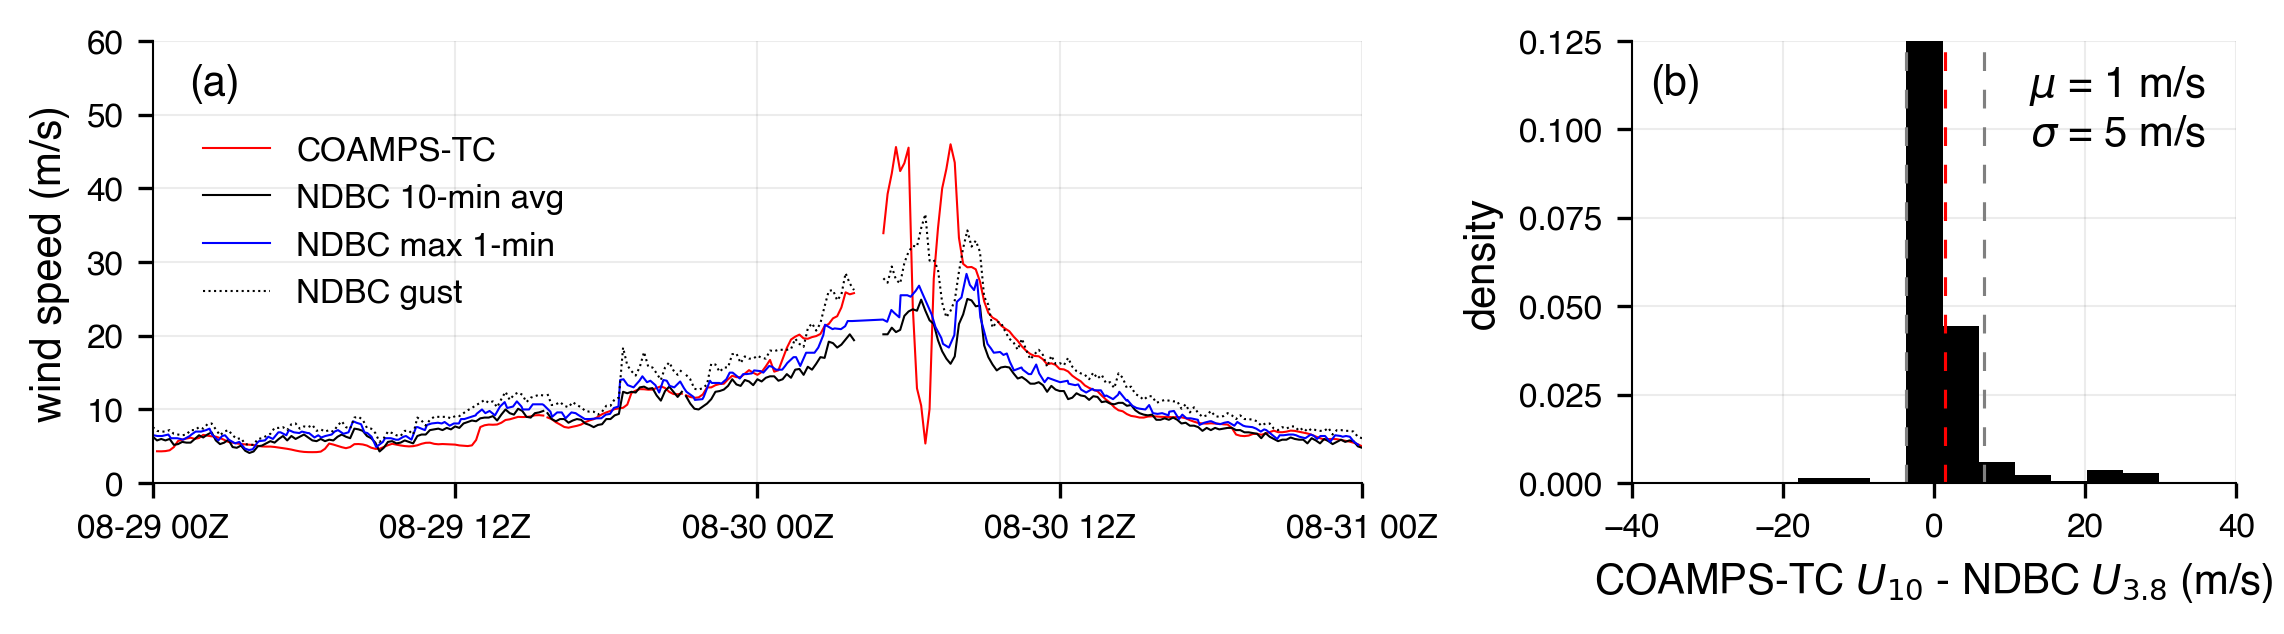

In [120]:
FIG_TITLE = ("afig-coamps_ndbc_wind_speed_time_series")
FIG_SIZE = (7.5, 2)

gs_kwargs = dict(
    width_ratios=[2, 1],
)
label_kwargs = dict(loc='upper left', nudge_x=-0.02, nudge_y=0.00)

fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

ax = next(axes_iter)
plot_coamps_ndbc_time_series(ax, ndbc_ds)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
plot_coamps_ndbc_histogram(ax, error_ndbc)
labeler.add_label(ax, **label_kwargs)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')

## Store

In [26]:
%%capture
%store microswift_df
%store spotter_df
%store fit_df
%store tanh_fit

## References

Davis, J. R., Thomson, J., Houghton, I. A., Doyle, J. D., Komaromi, W. A., Fairall, C. W., Thompson, E. J., & Moskaitis, J. R. (2023). Saturation of Ocean Surface Wave Slopes Observed During Hurricanes. Geophysical Research Letters, 50(16), e2023GL104139. https://doi.org/10.1029/2023GL104139
